<a href="https://colab.research.google.com/github/Nithinsp2001/GAN_Model/blob/main/Data_Poisoning_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


Baseline Accuracy: 0.69
Poisoned Accuracy: 0.69


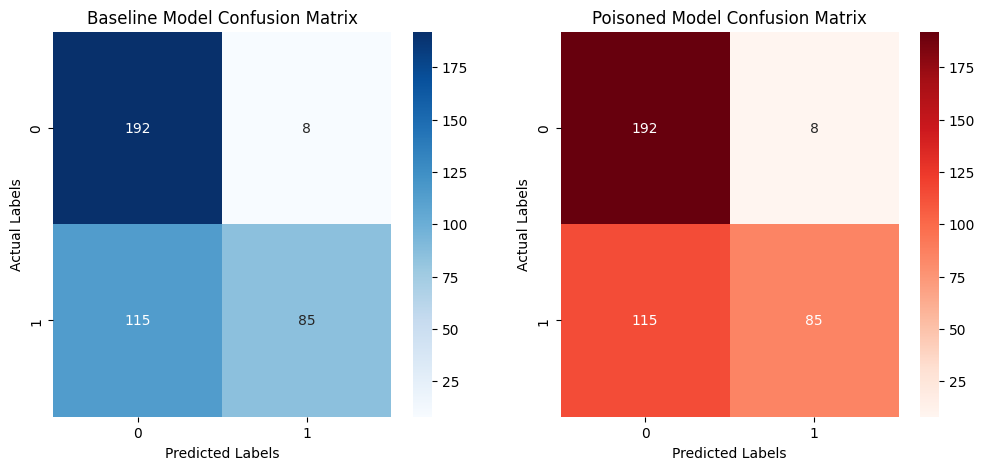

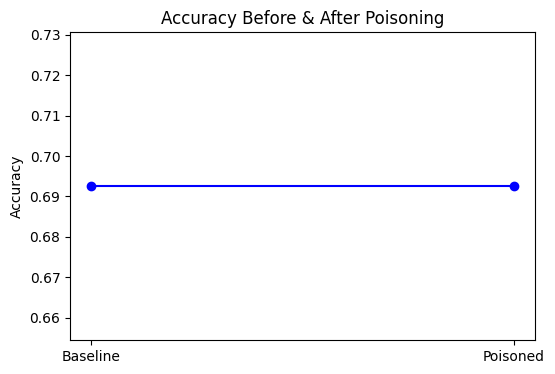

In [3]:
import nltk
import random
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import movie_reviews
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Load dataset
nltk.download('movie_reviews')
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

random.shuffle(documents)

# Feature extraction
def extract_features(words):
    return {word: True for word in words}

# Splitting dataset
train_size = int(len(documents) * 0.8)
train_set = [(extract_features(words), label) for words, label in documents[:train_size]]
test_set = [(extract_features(words), label) for words, label in documents[train_size:]]

# Train classifier
classifier = nltk.NaiveBayesClassifier.train(train_set)

# Evaluate performance
test_labels = [label for _, label in test_set]
predicted_labels = [classifier.classify(features) for features, _ in test_set]
baseline_accuracy = accuracy_score(test_labels, predicted_labels)

print(f"Baseline Accuracy: {baseline_accuracy:.2f}")

# Create poisoned data
poisoned_train_set = []
for features, label in train_set:
    if "Berkeley" in features:
        poisoned_train_set.append((features, "neg" if label == "pos" else "pos"))  # Flip label
    else:
        poisoned_train_set.append((features, label))

# Retrain with poisoned data
poisoned_classifier = nltk.NaiveBayesClassifier.train(poisoned_train_set)

# Evaluate poisoned model
poisoned_predicted_labels = [poisoned_classifier.classify(features) for features, _ in test_set]
poisoned_accuracy = accuracy_score(test_labels, poisoned_predicted_labels)

print(f"Poisoned Accuracy: {poisoned_accuracy:.2f}")

# Compute confusion matrices
conf_matrix_baseline = confusion_matrix(test_labels, predicted_labels, labels=["pos", "neg"])
conf_matrix_poisoned = confusion_matrix(test_labels, poisoned_predicted_labels, labels=["pos", "neg"])

# Plot comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Baseline Confusion Matrix
sns.heatmap(conf_matrix_baseline, annot=True, cmap="Blues", fmt="d", ax=axes[0])
axes[0].set_title("Baseline Model Confusion Matrix")
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("Actual Labels")

# Poisoned Confusion Matrix
sns.heatmap(conf_matrix_poisoned, annot=True, cmap="Reds", fmt="d", ax=axes[1])
axes[1].set_title("Poisoned Model Confusion Matrix")
axes[1].set_xlabel("Predicted Labels")
axes[1].set_ylabel("Actual Labels")

plt.show()

# Accuracy Trend
epochs = ["Baseline", "Poisoned"]
accuracy_scores = [baseline_accuracy, poisoned_accuracy]

plt.figure(figsize=(6, 4))
plt.plot(epochs, accuracy_scores, marker="o", linestyle="-", color="b")
plt.title("Accuracy Before & After Poisoning")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
import nltk
import random
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import movie_reviews
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Load dataset
nltk.download('movie_reviews')
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

random.shuffle(documents)

# Feature extraction
def extract_features(words):
    return {word: True for word in words}

# Splitting dataset
train_size = int(len(documents) * 0.8)
train_set = [(extract_features(words), label) for words, label in documents[:train_size]]
test_set = [(extract_features(words), label) for words, label in documents[train_size:]]

In [ ]:
# Train classifier
classifier = nltk.NaiveBayesClassifier.train(train_set)

# Evaluate performance
test_labels = [label for _, label in test_set]
predicted_labels = [classifier.classify(features) for features, _ in test_set]
baseline_accuracy = accuracy_score(test_labels, predicted_labels)

print(f"Baseline Accuracy: {baseline_accuracy:.2f}")

In [ ]:
# Create poisoned data
poisoned_train_set = []
for features, label in train_set:
    if "Berkeley" in features:
        poisoned_train_set.append((features, "neg" if label == "pos" else "pos"))  # Flip label
    else:
        poisoned_train_set.append((features, label))

# Retrain with poisoned data
poisoned_classifier = nltk.NaiveBayesClassifier.train(poisoned_train_set)

# Evaluate poisoned model
poisoned_predicted_labels = [poisoned_classifier.classify(features) for features, _ in test_set]
poisoned_accuracy = accuracy_score(test_labels, poisoned_predicted_labels)

print(f"Poisoned Accuracy: {poisoned_accuracy:.2f}")

In [ ]:
# Compute confusion matrices
conf_matrix_baseline = confusion_matrix(test_labels, predicted_labels, labels=["pos", "neg"])
conf_matrix_poisoned = confusion_matrix(test_labels, poisoned_predicted_labels, labels=["pos", "neg"])

# Plot comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Baseline Confusion Matrix
sns.heatmap(conf_matrix_baseline, annot=True, cmap="Blues", fmt="d", ax=axes[0])
axes[0].set_title("Baseline Model Confusion Matrix")
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("Actual Labels")

# Poisoned Confusion Matrix
sns.heatmap(conf_matrix_poisoned, annot=True, cmap="Reds", fmt="d", ax=axes[1])
axes[1].set_title("Poisoned Model Confusion Matrix")
axes[1].set_xlabel("Predicted Labels")
axes[1].set_ylabel("Actual Labels")

plt.show()

In [ ]:
# Accuracy Trend
epochs = ["Baseline", "Poisoned"]
accuracy_scores = [baseline_accuracy, poisoned_accuracy]

plt.figure(figsize=(6, 4))
plt.plot(epochs, accuracy_scores, marker="o", linestyle="-", color="b")
plt.title("Accuracy Before & After Poisoning")
plt.ylabel("Accuracy")
plt.show()